# Initialize Fiddler Client

In [1]:
import fiddler as fdl
client = fdl.FiddlerApi()

# Load dataset

In [2]:
import pandas as pd

df = pd.read_csv('/app/fiddler_samples/samples/datasets/heart_disease/data.csv')
df_schema = fdl.DatasetInfo.from_dataframe(df, max_inferred_cardinality=1000)

In [3]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,target
0,63,1,145,233,1,150,0,2.3,3,0
1,67,1,160,286,0,108,1,1.5,2,1
2,67,1,120,229,0,129,1,2.6,2,0
3,37,1,130,250,0,187,0,3.5,3,0
4,41,0,130,204,0,172,0,1.4,1,0


# Upload dataset

In [4]:
if 'heart_disease' not in client.list_datasets():
    upload_result = client.upload_dataset(
        dataset={'data': df}, 
        dataset_id='heart_disease')

# Create project

In [5]:
project_id = 'tutorial'

if project_id not in client.list_projects():
    client.create_project(project_id)

# Create model schema

In [6]:
target = 'target'
train_input = df.drop(columns=['target'])
train_target = df[target]

feature_columns = list(train_input.columns)

model_info = fdl.ModelInfo.from_dataset_info(
    dataset_info=client.get_dataset_info('heart_disease'),
    target=target, 
    features=feature_columns,
    display_name='Keras Tabular IG',
    description='this is a keras model using tabular data and IG enabled from tutorial',
    model_task=fdl.ModelTask.BINARY_CLASSIFICATION
)

## Install TensorFlow if necessary

In [ ]:
# !pip install tensorflow==1.14

# Train model

In [7]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(train_input.shape[1], ))
activations = tf.keras.layers.Dense(32, activation='linear', use_bias=True)(inputs)
activations = tf.keras.layers.Dense(128, activation=tf.nn.relu, use_bias=True)(activations)
activations = tf.keras.layers.Dense(128, activation=tf.nn.relu, use_bias=True)(activations)
activations = tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True)(activations)
model = tf.keras.Model(inputs=inputs, outputs=activations, name='keras_model')

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(train_input, train_target.values, batch_size=32, epochs=8)

/Users/leagenuit/opt/anaconda3/envs/fiddler/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/leagenuit/opt/anaconda3/envs/fiddler/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/leagenuit/opt/anaconda3/envs/fiddler/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/leagenuit/op

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/leagenuit/opt/anaconda3/envs/fiddler/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/leagenuit/opt/anaconda3/envs/fiddler/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/leagenuit/opt/anaconda3/envs/fiddler/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

Epoch 1/8
303/303 [==============================] - 0s 494us/sample - loss: 1.6299 - acc: 0.6535
Epoch 2/8
303/303 [==============================] - 0s 54us/sample - loss: 0.8188 - acc: 0.6667
Epoch 3/8
303/303 [==============================] - 0s 52us/sample - loss: 0.7701 - acc: 0.6898
Epoch 4/8
303/303 [==============================] - 0s 52us/sample - loss: 0.5647 - acc: 0.7261
Epoch 5/8
303/303 [==============================] - 0s 51us/sample - loss: 0.9328 - acc: 0.6766
Epoch 6/8
303/303 [==============================] - 0s 62us/sample - loss: 0.7327 - acc: 0.7195
Epoch 7/8
303/303 [==============================] - 0s 54us/sample - loss: 0.7437 - acc: 0.6832
Epoch 8/8
303/303 [==============================] - 0s 60us/sample - loss: 0.6358 - acc: 0.6898


In [8]:
model.evaluate(train_input, train_target) 

303/303 [==============================] - 0s 119us/sample - loss: 0.8181 - acc: 0.7261


[0.8180775111264521, 0.7260726]

# Save model and schema

In [9]:
import pathlib
import shutil
import yaml

# Let's save the model in the TF Saved Model format
model_id_tf = 'heart_disease_tf'

# create temp dir
model_dir_tf = pathlib.Path(model_id_tf)
shutil.rmtree(model_dir_tf, ignore_errors=True)
model_dir_tf.mkdir()

# save model
tf.saved_model.save(model, str(model_dir_tf / 'saved_model'))

INFO:tensorflow:Assets written to: heart_disease_tf/saved_model/assets


# Write package.py and related wrappers

### Import related wrappers

We need to import 2 wrappers for tensorflow. Those files are stored in the utils directory.
- The tf_saved_model_wrapper.py file contains a wrapper to load and run a TF model from a saved_model path.
- The tf_saved_model_wrapper_ig.py file contains a wrapper to support Integrated Gradients (IG) computation for a TF model loaded from a saved_model path.

In [11]:
files = ['utils/tf_saved_model_wrapper.py', 'utils/tf_saved_model_wrapper_ig.py']
for f in files:
    shutil.copy(f, model_dir_tf)

In [12]:
%%writefile heart_disease_tf/package.py

import pathlib
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from .tf_saved_model_wrapper_ig import TFSavedModelWrapperIg

tf.compat.v1.disable_eager_execution()

PACKAGE_PATH = pathlib.Path(__file__).parent
SAVED_MODEL_PATH = PACKAGE_PATH / 'saved_model'

class MyModel(TFSavedModelWrapperIg):
    """
    :param saved_model_path: Path to the directory containing the TF
       model in SavedModel format.
       See: https://www.tensorflow.org/guide/saved_model#build_and_load_a_savedmodel

    :param sig_def_key: Key for the specific SignatureDef to be used for
       executing the model.
       See: https://www.tensorflow.org/tfx/serving/signature_defs#signaturedef_structure

    :param output_columns: List containing the names of the output
       column(s) that corresponds to the output of the model. If the
       model is a binary classification model then the number of output
       columns is one, otherwise, the number of columns must match the
       shape of the output tensor corresponding to the output key
       specified.

    :param is_binary_classification [optional]: Boolean specifying if the
       model is a binary classification model. If True, the number of
       output columns is one. The default is False.

    :param output_key [optional]: Key for the specific output tensor (
       specified in the SignatureDef) whose predictions must be explained.
       The output tensor must specify a differentiable output of the
       model. Thus, output tensors that are generated as a result of
       discrete operations (e.g., argmax) are disallowed. The default is
       None, in which case the first output listed in the SignatureDef is
       used. The 'saved_model_cli' can be used to view the output tensor
       keys available in the signature_def.
       See: https://www.tensorflow.org/guide/saved_model#cli_to_inspect_and_execute_savedmodel

    :param batch_size [optional]: the batch size for input into the model.
       Depends on model and instance config.

    :param input_tensor_to_differentiable_layer_mapping [optional]:
       Dictionary that maps input tensors to the first differentiable
       layer/tensor in the graph they are attached to. For instance,
       in a text model, an input tensor containing token ids
       may not be differentiable but may feed into an embedding tensor.
       Such an input tensor must be mapped to the corresponding the
       embedding tensor in this dictionary.

       All input tensors must be mentioned in the dictionary. An input
       tensor that is directly differentiable may be mapped to itself.

       For each differentiable tensor, the first dimension must be the
       batch dimension. If <k1, …, kn> is the shape of the input then the
       differentiable tensor must either have the same shape or the shape
       <k1, …, kn, d>.

       The default is None, in which case all input tensors are assumed
       to be differentiable.

    :param max_allowed_error: Float specifying a percentage value
       for the maximum allowed integral approximation error for IG
       computation. If None then IG will be  calculated for a
       pre-determined number of steps. Otherwise, the number of steps
       will be increased till the error is within the specified limit.
    """
    def __init__(self, saved_model_path, sig_def_key,
                 is_binary_classification=False,
                 output_key=None,
                 batch_size=8,
                 output_columns=[],
                 input_tensor_to_differentiable_layer_mapping={},
                 max_allowed_error=None):
        
        super().__init__(saved_model_path, sig_def_key,
                         is_binary_classification=is_binary_classification,
                         output_key=output_key,
                         batch_size=batch_size,
                         output_columns=output_columns,
                         input_tensor_to_differentiable_layer_mapping=
                         input_tensor_to_differentiable_layer_mapping,
                         max_allowed_error=max_allowed_error)


    def transform_input(self, input_df):
        """
        Transform the provided pandas DataFrame into one that complies with
        the input interface of the model. This method returns a pandas
        DataFrame with columns corresponding to the input tensor keys in the
        SavedModel SignatureDef. The contents of each column match the input
        tensor shape described in the SignatureDef.

        Args:
        :param input_df: DataFrame corresponding to the dataset yaml
            associated with the project. Specifically, the columns in the
            DataFrame must correspond to the feature names mentioned in the
            yaml.

        Returns:
        - transformed_input_df: DataFrame with columns corresponding to the
            input tensor keys in the saved model SignatureDef. The contents
            of the columns must match the corresponding shape of the input
            tensor described in the SignatureDef. For instance, if the
            input to the model is a serialized tf.Example then the returned
            DataFrame would have a single column containing serialized
            examples.

        """
        return pd.DataFrame({'input_1': input_df.values.tolist()})

    def generate_baseline(self, input_df):
        """
        Generates a DataFrame specifying a baseline that is required for
        calculating Integrated Gradients.

        The Baseline is a certain 'informationless' input relative to which
        attributions must be computed. For instance, in a text
        classification model, the baseline could be the empty text.

        The baseline could be the same for all inputs or could be specific
        to the input at hand. 

        The choice of baseline is important as explanations are contextual to a
        baseline. For more information please refer to the following document:
        https://github.com/ankurtaly/Integrated-Gradients/blob/master/howto.md
        """
        baseline = input_df * 0
        return pd.DataFrame({'input_1': baseline.values.tolist()})

    def project_attributions(self, input_df, transformed_input_df,
                             attributions):
        """
        Maps the attributions for the provided transformed_input to
        the original untransformed input.

        This method returns a dictionary mapping features of the untransformed
        input to the untransformed feature value, and (projected) attributions
        computed for that feature.

        This method guarantees that for each feature the projected attributions
        have the same shape as the (returned) untransformed feature value. The
        specific projection being applied is left as an implementation detail.
        Below we provided some guidance on the projections that should be
        applied for three different transformations

        Identity transformation
        This is the simplest case. Since the transformation is identity, the
        projection would also be the identity function.

        One-hot transformation for categorical features
        Here the original feature is categorical, and the transformed feature
        is a one-hot encoding. In this case, the returned untransformed feature
        value is the specific input category, and the projected attribution is
        the sum of the attribution across all fields of the one-hot encoding.

        Token ID transformation for text features
        Here the original feature is a sentence, and transformed feature is a
        vector of token ids (w.r.t.a certain vocabulary). Here the
        untransformed feature value would be a vector of tokens corresponding
        to the token ids, and the projected attribution vector would be the
        same as the one provided to this method. In some cases, token ids
        corresponding to dummy token such a padding tokens, start tokens, end
        tokens, etc. may be ignored during the projection. In that case, the
        attributions values  corresponding to these tokens must be dropped from
        the projected attributions vector.

        :param input_df: Pandas DataFrame specifying the input whose prediction
            is being attributed. Its columns must correspond to the dataset
            yaml associated with the project. Specifically, the columns must
            correspond to the feature names mentioned in the yaml.

        :param transformed_input_df: Pandas DataFrame returned by the
            transform_input method extended in package.py. It has exactly
            one row as currently only instance explanations are supported.

        :param attributions: dictionary mapping each column of the
            transformed_input to the corresponding attributions tensor. The
            attribution tensor must have the same shape as corresponding
            column in transformed_input.

        Returns:
        - projected_inputs: dictionary with keys being the features of the
            original untransformed input. The features are specified in the
            model.yaml. The keys are mapped to a pair containing the original
            untransformed input and the projected attribution.
        """
        return {col: attributions['input_1'][0][i].tolist()
                for i, col in enumerate(list(input_df.columns))}


def get_model():
    model = MyModel(
        SAVED_MODEL_PATH,
        tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY,
        is_binary_classification=True,
        batch_size=32,
        output_columns=['predicted_target'],
        input_tensor_to_differentiable_layer_mapping=
        {'input_1': 'serving_default_input_1:0'},
        max_allowed_error=5
    )
    model.load_model()
    return model

Writing heart_disease_tf/package.py


# Upload model

In [15]:
# Let's first delete the model if it already exists in the project
if model_id_tf in client.list_models(project_id):
    client.delete_model(project_id, model_id_tf)
    print('Model deleted')
    
client.upload_model_custom(model_dir_tf, model_info, project_id, model_id_tf)

Model deleted


{'model': {'name': 'Keras Tabular IG',
  'input-type': 'structured',
  'model-task': 'binary_classification',
  'inputs': [{'column-name': 'age', 'data-type': 'int'},
   {'column-name': 'sex', 'data-type': 'int'},
   {'column-name': 'trestbps', 'data-type': 'int'},
   {'column-name': 'chol', 'data-type': 'int'},
   {'column-name': 'fbs', 'data-type': 'int'},
   {'column-name': 'thalach', 'data-type': 'int'},
   {'column-name': 'exang', 'data-type': 'int'},
   {'column-name': 'oldpeak', 'data-type': 'float'},
   {'column-name': 'slope', 'data-type': 'int'}],
  'outputs': [{'column-name': 'predicted_target',
    'data-type': 'float',
    'is-nullable': False}],
  'datasets': ['heart_disease'],
  'targets': [{'column-name': 'target', 'data-type': 'int'}],
  'description': 'this is a keras model using tabular data and IG enabled from tutorial'}}

# Run model

In [16]:
prediction_input = train_input[:10]
result = client.run_model(project_id, model_id_tf, prediction_input, log_events=True)
result

,predicted_target
0,0.034779
1,0.233359
2,0.057097
3,0.002883
4,0.006785
5,0.003122
6,0.019532
7,0.011986
8,0.029182
9,0.029228


# Get explanation

In [17]:
selected_point = df.head(1)

In [18]:
ex_ig = client.run_explanation(
    project_id=project_id,
    model_id=model_id_tf, 
    df=selected_point, 
    dataset_id='heart_disease',
    explanations='ig')

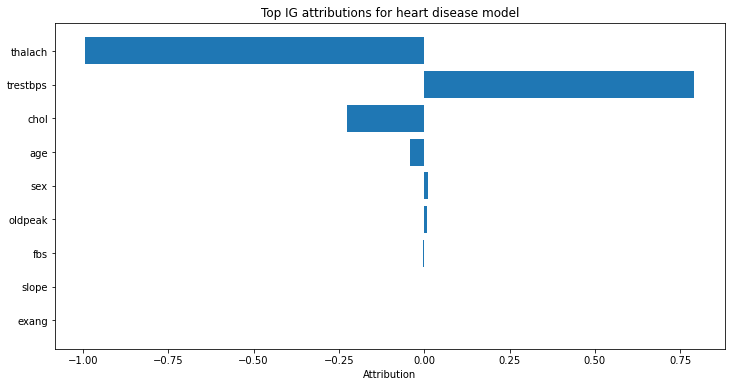

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(12, 6))
num_features = selected_point.shape[1] - 1
sorted_att_list = sorted(list(zip(np.abs(ex_ig.attributions), ex_ig.inputs, ex_ig.attributions)),
                         reverse=True)
out_list = [[f[1], f[2]] for f in sorted_att_list]
out_list = np.asarray(out_list[::-1])

plt.barh(list(range(num_features)), out_list[:,1].astype('float'))
plt.yticks(list(range(num_features)), out_list[:,0]);
plt.xlabel('Attribution')
plt.title(f'Top IG attributions for heart disease model')
plt.show()